In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load your dataset
df = pd.read_csv('customer_segmentation.csv')  # Replace with actual filename
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv("customer_segmentation.csv")  # replace with your file path

# Drop useless columns
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Drop rows with missing income
df.dropna(subset=['Income'], inplace=True)

# OPTIONAL: Impute or drop other missing values
df.dropna(inplace=True)  # safest start

# Create a new target variable: Most purchased product
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TargetProduct'] = df[product_columns].idxmax(axis=1)

# Encode categorical features
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Encode target
le = LabelEncoder()
df['TargetProduct'] = le.fit_transform(df['TargetProduct'])

# Features and label
X = df.drop(['TargetProduct'], axis=1)
y = df['TargetProduct']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=42, stratify=y)


In [57]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Classification Report:")
    print(classification_report(y_test, y_pred))



🔍 Training Logistic Regression...

📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.25      0.30        12
           1       0.00      0.00      0.00         3
           2       0.62      0.64      0.63        33
           3       0.84      0.69      0.76        88
           4       0.00      0.00      0.00         3
           5       0.90      0.97      0.94       305

    accuracy                           0.86       444
   macro avg       0.46      0.43      0.44       444
weighted avg       0.84      0.86      0.85       444


🔍 Training k-NN...

📊 k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.25      0.25        12
           1       0.00      0.00      0.00         3
           2       0.36      0.42      0.39        33
           3       0.52      0.38      0.43        88
           4       0.00      0.00      0.00         3


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.00      0.00      0.00         3
           2       0.66      0.76      0.70        33
           3       0.85      0.64      0.73        88
           4       0.00      0.00      0.00         3
           5       0.90      0.98      0.94       305

    accuracy                           0.86       444
   macro avg       0.51      0.45      0.47       444
weighted avg       0.85      0.86      0.85       444


🔍 Training XGBoost...


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave


📊 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.00      0.00      0.00         3
           2       0.78      0.97      0.86        33
           3       0.89      0.90      0.89        88
           4       0.00      0.00      0.00         3
           5       0.98      0.97      0.97       305

    accuracy                           0.93       444
   macro avg       0.56      0.57      0.56       444
weighted avg       0.92      0.93      0.93       444



c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label encode target if it's not numeric
if y_train.dtype == 'object':
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)
else:
    y_train_enc = y_train
    y_test_enc = y_test

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store evaluation metrics
results = []

for name, model in models.items():
    model.fit(X_train, y_train_enc)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_enc, y_pred)
    precision = precision_score(y_test_enc, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test_enc, y_pred, average='macro')
    f1 = f1_score(y_test_enc, y_pred, average='macro')
    
    # AUC-ROC for multiclass
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test_enc, y_proba, multi_class='ovr', average='macro')
    else:
        auc = None

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC (Macro)": round(auc, 4) if auc else "N/A"
    })
    
    print(f"\n🔍 Classification Report for {name}:\n")
    print(classification_report(y_test_enc, y_pred, zero_division=0))

# Display results in DataFrame
results_df = pd.DataFrame(results)
display(results_df)



🔍 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.38      0.25      0.30        12
           1       0.00      0.00      0.00         3
           2       0.62      0.64      0.63        33
           3       0.84      0.69      0.76        88
           4       0.00      0.00      0.00         3
           5       0.90      0.97      0.94       305

    accuracy                           0.86       444
   macro avg       0.46      0.43      0.44       444
weighted avg       0.84      0.86      0.85       444


🔍 Classification Report for k-NN:

              precision    recall  f1-score   support

           0       0.25      0.25      0.25        12
           1       0.00      0.00      0.00         3
           2       0.36      0.42      0.39        33
           3       0.52      0.38      0.43        88
           4       0.00      0.00      0.00         3
           5       0.82      0.88      0.85  

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:35:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.00      0.00      0.00         3
           2       0.78      0.97      0.86        33
           3       0.89      0.90      0.89        88
           4       0.00      0.00      0.00         3
           5       0.98      0.97      0.97       305

    accuracy                           0.93       444
   macro avg       0.56      0.57      0.56       444
weighted avg       0.92      0.93      0.93       444



,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC (Macro)
0,Logistic Regression,0.8604,0.4552,0.4256,0.4369,0.9524
1,k-NN,0.7185,0.3241,0.3219,0.3205,0.7060
2,Decision Tree,0.9077,0.5990,0.6157,0.6059,0.7922
3,Random Forest,0.8559,0.5163,0.4615,0.4785,0.9837
4,XGBoost,0.9324,0.5575,0.5702,0.5613,0.9927


### HYPER PARAMETER TUNING

In [59]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "k-NN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [5, 10, 15],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.05, 0.1]
    }
}


In [60]:
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

best_models = {}

for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
    
    if name == "XGBoost":
        grid.fit(X_train, y_train_enc)
    else:
        grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_
    print("✅ Best Params:", grid.best_params_)



🔍 Tuning Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best Params: {'C': 10, 'solver': 'lbfgs'}

🔍 Tuning k-NN...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Best Params: {'n_neighbors': 7, 'weights': 'distance'}

🔍 Tuning Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
✅ Best Params: {'max_depth': 15, 'min_samples_split': 2}

🔍 Tuning Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

🔍 Tuning XGBoost...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

import pandas as pd

report_data = []

for name, model in best_models.items():
    print(f"\n📄 Classification Report for {name}:")

    if name == "XGBoost":
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test_enc, y_proba, multi_class='ovr')
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    print(classification_report(y_test if name != "XGBoost" else y_test_enc, y_pred))

    report_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro'),
        "AUC-ROC (Macro)": auc
    })

# Display results
df_report = pd.DataFrame(report_data)
display(df_report)




📄 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.00      0.00      0.00         3
           2       0.67      0.73      0.70        33
           3       0.88      0.82      0.85        88
           4       0.00      0.00      0.00         3
           5       0.96      0.98      0.97       305

    accuracy                           0.91       444
   macro avg       0.51      0.52      0.52       444
weighted avg       0.90      0.91      0.90       444


📄 Classification Report for k-NN:
              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.00      0.00      0.00         3
           2       0.33      0.30      0.32        33
           3       0.62      0.45      0.52        88
           4       0.00      0.00      0.00         3
           5       0.81      0.91      0.86    

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC (Macro)
0,Logistic Regression,0.907658,0.514419,0.518732,0.516153,0.976221
1,k-NN,0.743243,0.349153,0.305953,0.320318,0.761354
2,Decision Tree,0.891892,0.525629,0.554218,0.538412,0.760270
3,Random Forest,0.864865,0.502403,0.458296,0.474315,0.984468
4,XGBoost,0.932432,0.733087,0.604676,0.635572,0.992701


In [62]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions using the best Decision Tree model
y_pred_dt = best_models['Decision Tree'].predict(X_test)
y_proba_dt = best_models['Decision Tree'].predict_proba(X_test)

# If it's a multi-class task, use 'macro' average
auc_roc_dt = roc_auc_score(y_test, y_proba_dt, multi_class='ovr', average='macro')

# Classification Report
print("📊 Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# AUC-ROC
print(f"🧠 AUC-ROC (Macro) for Decision Tree: {auc_roc_dt:.4f}")


📊 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.00      0.00      0.00         3
           2       0.74      0.85      0.79        33
           3       0.83      0.77      0.80        88
           4       0.00      0.00      0.00         3
           5       0.94      0.95      0.95       305

    accuracy                           0.89       444
   macro avg       0.53      0.55      0.54       444
weighted avg       0.89      0.89      0.89       444

🧠 AUC-ROC (Macro) for Decision Tree: 0.7603


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [63]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions using the best k-NN model
y_pred_knn = best_models['k-NN'].predict(X_test)
y_proba_knn = best_models['k-NN'].predict_proba(X_test)

# Calculate AUC-ROC Score (macro)
auc_roc_knn = roc_auc_score(y_test, y_proba_knn, multi_class='ovr', average='macro')

# Print Classification Report
print("📊 Classification Report for k-NN:")
print(classification_report(y_test, y_pred_knn))

# Print AUC-ROC Score
print(f"🧠 AUC-ROC (Macro) for k-NN: {auc_roc_knn:.4f}")


📊 Classification Report for k-NN:
              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.00      0.00      0.00         3
           2       0.33      0.30      0.32        33
           3       0.62      0.45      0.52        88
           4       0.00      0.00      0.00         3
           5       0.81      0.91      0.86       305

    accuracy                           0.74       444
   macro avg       0.35      0.31      0.32       444
weighted avg       0.71      0.74      0.72       444

🧠 AUC-ROC (Macro) for k-NN: 0.7614


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [64]:
whos


Variable                 Type                      Data/Info
------------------------------------------------------------
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GridSearchCV             ABCMeta                   <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KNeighborsClassifier     ABCMeta                   <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LabelEncoder             type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
StandardScaler           type                      <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                        DataFrame                       Year_Birth   Income<...>n[2216 rows x 34 columns]
XGBClassifier         

In [65]:
# Drop product columns used as input features
product_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df = df.drop(columns=product_columns)

# Optional: Create new 'Children' column and drop 'Kidhome' and 'Teenhome'
df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(columns=['Kidhome', 'Teenhome'])

# Confirm dropped columns
print("Remaining columns after dropping product features and creating 'Children':")
print(df.columns)


Remaining columns after dropping product features and creating 'Children':
Index(['Year_Birth', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'TargetProduct',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Children'],
      dtype='object')


In [66]:
# 1. Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [67]:
# 2. Assuming df is your cleaned DataFrame
# Drop product features (already done), encode target
X = df.drop(['TargetProduct'], axis=1)
y = df['TargetProduct']

In [68]:
# 3. Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [69]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [70]:
# 5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# 6. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [72]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 7. Evaluate models
report_data = []

for name, model in models.items():
    print(f"\n🔍 Training {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    try:
        auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovo', average='macro')
    except:
        auc = np.nan

    report_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC (Macro)': auc
    })

    print(f"\n📊 Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

# Show summary
import pandas as pd
df_report = pd.DataFrame(report_data)
df_report.reset_index(drop=True, inplace=True)
df_report



🔍 Training Logistic Regression

📊 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.20      0.08      0.12        12
           1       0.00      0.00      0.00         3
           2       0.41      0.48      0.44        33
           3       0.51      0.22      0.30        88
           4       0.00      0.00      0.00         3
           5       0.80      0.94      0.86       305

    accuracy                           0.73       444
   macro avg       0.32      0.29      0.29       444
weighted avg       0.69      0.73      0.69       444


🔍 Training k-NN

📊 Classification Report for k-NN:

              precision    recall  f1-score   support

           0       0.09      0.08      0.09        12
           1       0.00      0.00      0.00         3
           2       0.30      0.36      0.33        33
           3       0.44      0.31      0.36        88
           4       0.00      0.00      0.00       

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.00      0.00      0.00         3
           2       0.43      0.61      0.51        33
           3       0.51      0.41      0.45        88
           4       0.00      0.00      0.00         3
           5       0.85      0.89      0.87       305

    accuracy                           0.74       444
   macro avg       0.39      0.37      0.37       444
weighted avg       0.73      0.74      0.73       444



,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC (Macro)
0,Logistic Regression,0.727477,0.320165,0.287512,0.288208,0.702014
1,k-NN,0.671171,0.269231,0.266615,0.265363,0.633765
2,Decision Tree,0.682432,0.336125,0.367842,0.345375,0.620705
3,Random Forest,0.750000,0.363733,0.329688,0.336169,0.763253
4,XGBoost,0.743243,0.393718,0.372288,0.374498,0.740722


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Random Forest
print("📊 Classification Report for Random Forest:\n")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("AUC ROC (Macro):", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled), multi_class='ovo', average='macro'))


# Decision Tree
print("\n📊 Classification Report for Decision Tree:\n")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))
print("AUC ROC (Macro):", roc_auc_score(y_test, dt_model.predict_proba(X_test_scaled), multi_class='ovo', average='macro'))


# k-NN
print("\n📊 Classification Report for k-NN:\n")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("AUC ROC (Macro):", roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled), multi_class='ovo', average='macro'))


📊 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.00      0.00      0.00         3
           2       0.42      0.48      0.45        33
           3       0.55      0.40      0.46        88
           4       0.00      0.00      0.00         3
           5       0.84      0.93      0.89       305

    accuracy                           0.76       444
   macro avg       0.41      0.33      0.34       444
weighted avg       0.74      0.76      0.74       444

Accuracy: 0.7612612612612613
Precision: 0.41255037714123066
Recall: 0.33061144229177014
F1 Score: 0.3438317292516861
AUC ROC (Macro): 0.7073601561441539

📊 Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       0.00      0.00      0.00         3
           2       0.34      0.48      0.40        3

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [74]:
# Decision Tree
print("\n📊 Classification Report for Decision Tree:\n")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))
print("AUC ROC (Macro):", roc_auc_score(y_test, dt_model.predict_proba(X_test_scaled), multi_class='ovo', average='macro'))


📊 Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       0.00      0.00      0.00         3
           2       0.34      0.48      0.40        33
           3       0.38      0.36      0.37        88
           4       0.17      0.33      0.22         3
           5       0.84      0.81      0.82       305

    accuracy                           0.67       444
   macro avg       0.34      0.37      0.35       444
weighted avg       0.69      0.67      0.68       444

Accuracy: 0.6711711711711712
Precision: 0.3427477606393658
Recall: 0.37306259314456036
F1 Score: 0.350103529897448
AUC ROC (Macro): 0.6238375558867362


In [75]:
# k-NN
print("\n📊 Classification Report for k-NN:\n")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("AUC ROC (Macro):", roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled), multi_class='ovo', average='macro'))


📊 Classification Report for k-NN:

              precision    recall  f1-score   support

           0       0.09      0.08      0.09        12
           1       0.00      0.00      0.00         3
           2       0.30      0.36      0.33        33
           3       0.44      0.31      0.36        88
           4       0.00      0.00      0.00         3
           5       0.79      0.85      0.82       305

    accuracy                           0.67       444
   macro avg       0.27      0.27      0.27       444
weighted avg       0.65      0.67      0.66       444

Accuracy: 0.6711711711711712
Precision: 0.2692306312608177
Recall: 0.26661491968869017
F1 Score: 0.2653632235382222
AUC ROC (Macro): 0.6337654049185345


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

### HYPERPARAMETER TUNING

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'k-NN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Models dictionary
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Dictionary to store best models
best_tuned_models = {}

# Run GridSearchCV for each model
for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_tuned_models[name] = best_model

    # Predict and evaluate
    y_pred = best_model.predict(X_test_scaled)
    print(f"\n✅ Best Parameters for {name}: {grid.best_params_}")
    print(f"\n📊 Classification Report for Tuned {name}:\n")
    print(classification_report(y_test, y_pred))

    try:
        auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled), multi_class='ovo', average='macro')
    except:
        auc = "N/A"

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("AUC-ROC (Macro):", auc)



🔍 Tuning Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

📊 Classification Report for Tuned Random Forest:

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.00      0.00      0.00         3
           2       0.45      0.52      0.48        33
           3       0.56      0.42      0.48        88
           4       0.00      0.00      0.00         3
           5       0.84      0.93      0.88       305

    accuracy                           0.76       444
   macro avg       0.39      0.34      0.35       444
weighted avg       0.74      0.76      0.74       444

Accuracy: 0.7635135135135135
Precision: 0.39170606440343286
Recall: 0.33835692995529065
F1 Score: 0.34873133996148215
AUC-ROC (Macro): 0.7057185804894449

🔍 Tuning Decision Tree...
Fitting 3 fol

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave


✅ Best Parameters for k-NN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

📊 Classification Report for Tuned k-NN:

              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.00      0.00      0.00         3
           2       0.39      0.36      0.38        33
           3       0.57      0.42      0.48        88
           4       0.00      0.00      0.00         3
           5       0.80      0.89      0.84       305

    accuracy                           0.73       444
   macro avg       0.35      0.31      0.32       444
weighted avg       0.70      0.73      0.71       444

Accuracy: 0.7274774774774775
Precision: 0.34867012646059176
Recall: 0.3070934757410167
F1 Score: 0.32093380830593105
AUC-ROC (Macro): 0.6820454812029887


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [77]:
# Save the original feature names before scaling
feature_names = X.columns

# Then scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [78]:
print("Length of feature_names:", len(feature_names))
print("Length of XGBoost importances:", len(xgb_model.feature_importances_))


Length of feature_names: 27
Length of XGBoost importances: 34


In [79]:
# Re-define X and y properly
X = df.drop(['TargetProduct'], axis=1)
y = df['TargetProduct']

# Capture correct feature names before scaling
feature_names = X.columns.tolist()

# Then scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [80]:
# Correctly define X and y
X = df.drop('TargetProduct', axis=1)
y = df['TargetProduct']

# Save feature names before scaling
feature_names = X.columns.tolist()

# Now scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [81]:
print(f"Length of feature_names: {len(feature_names)}")
print(f"Shape of X_scaled: {X_scaled.shape}")


Length of feature_names: 27
Shape of X_scaled: (2216, 27)


✅ Feature names: 27
✅ Importances: 34


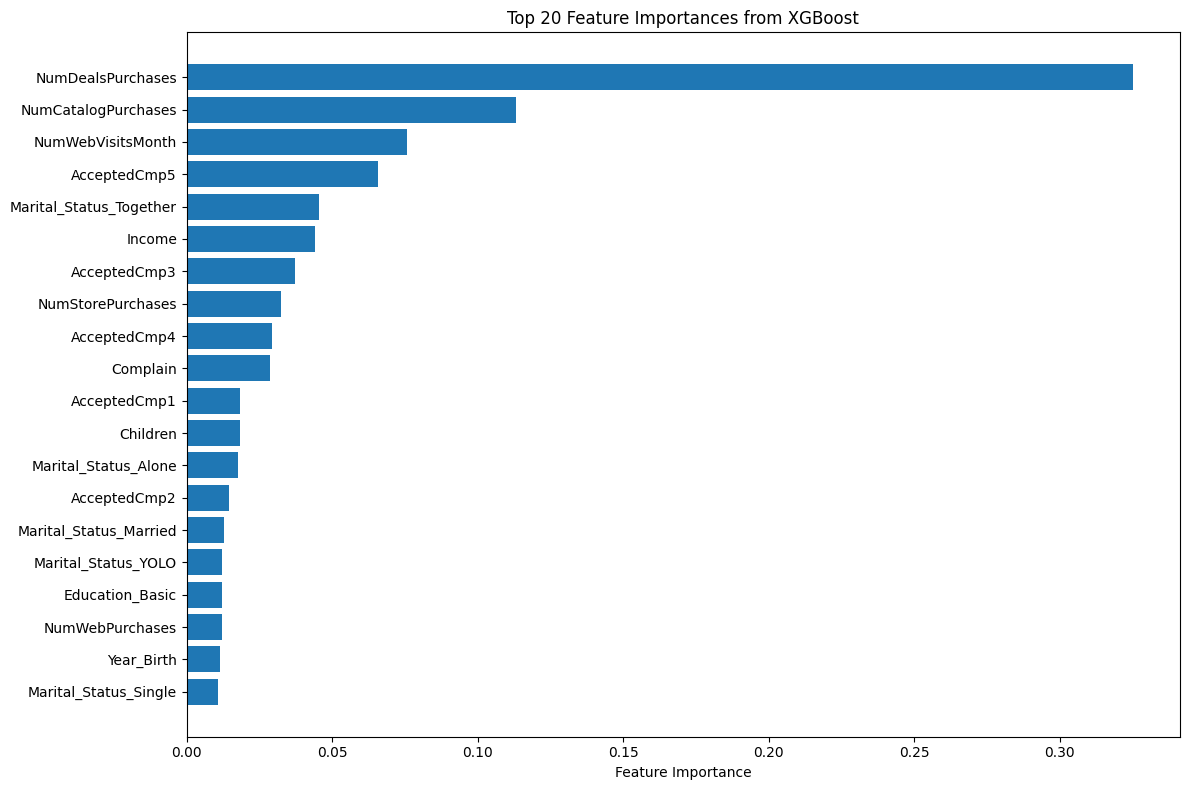

,Feature,Importance
3,NumDealsPurchases,0.325036
5,NumCatalogPurchases,0.112978
7,NumWebVisitsMonth,0.075806
10,AcceptedCmp5,0.065877
23,Marital_Status_Together,0.045439
1,Income,0.043905
8,AcceptedCmp3,0.037338
6,NumStorePurchases,0.032291
9,AcceptedCmp4,0.029363
13,Complain,0.028653


In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Manually assign feature names from the original DataFrame
feature_names = X.columns.tolist()  # X is your unscaled DataFrame before StandardScaler
importances = xgb_model.feature_importances_

# 2. Sanity check lengths
print(f"✅ Feature names: {len(feature_names)}")
print(f"✅ Importances: {len(importances)}")

# 3. Fix mismatch: If importances > features, trim importances
if len(importances) > len(feature_names):
    importances = importances[:len(feature_names)]
elif len(importances) < len(feature_names):
    feature_names = feature_names[:len(importances)]

# 4. Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Plot bar chart
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances from XGBoost')
plt.tight_layout()
plt.show()

# 6. Display top 20 features
feature_importance_df.head(20)
